# Importing needed libraries

In [1]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Importing list of coins

In [3]:
base = 'https://api.coingecko.com/api/v3/'
url = base + 'coins/list'

In [4]:
result = requests.get(url)
result

<Response [200]>

In [5]:
j = result.json()
j

[{'id': 'bitcoin', 'symbol': 'btc', 'name': 'Bitcoin'},
 {'id': 'litecoin', 'symbol': 'ltc', 'name': 'Litecoin'},
 {'id': 'auroracoin', 'symbol': 'aur', 'name': 'Auroracoin'},
 {'id': 'peercoin', 'symbol': 'ppc', 'name': 'Peercoin'},
 {'id': 'dogecoin', 'symbol': 'doge', 'name': 'Dogecoin'},
 {'id': 'nxt', 'symbol': 'nxt', 'name': 'NXT'},
 {'id': 'omni', 'symbol': 'omni', 'name': 'Omni'},
 {'id': 'namecoin', 'symbol': 'nmc', 'name': 'Namecoin'},
 {'id': 'counterparty', 'symbol': 'xcp', 'name': 'Counterparty'},
 {'id': 'quark', 'symbol': 'qrk', 'name': 'Quark'},
 {'id': 'feathercoin', 'symbol': 'ftc', 'name': 'Feathercoin'},
 {'id': 'primecoin', 'symbol': 'xpm', 'name': 'Primecoin'},
 {'id': 'infinitecoin', 'symbol': 'ifc', 'name': 'Infinitecoin'},
 {'id': 'novacoin', 'symbol': 'nvc', 'name': 'Novacoin'},
 {'id': 'megacoin', 'symbol': 'mec', 'name': 'Megacoin'},
 {'id': 'worldcoin', 'symbol': 'wdc', 'name': 'Worldcoin'},
 {'id': 'vertcoin', 'symbol': 'vtc', 'name': 'Vertcoin'},
 {'id': 

In [2]:
df_list = pd.DataFrame(j)
df_list.head(10)

,id,name,symbol
0,bitcoin,Bitcoin,btc
1,litecoin,Litecoin,ltc
2,auroracoin,Auroracoin,aur
3,peercoin,Peercoin,ppc
4,dogecoin,Dogecoin,doge
5,nxt,NXT,nxt
6,omni,Omni,omni
7,namecoin,Namecoin,nmc
8,counterparty,Counterparty,xcp
9,quark,Quark,qrk


## Importing Bitcoin market value for last 10 days, vs. EUR

In [3]:
# Bitcoin, vs.EUR, 10 Days
# request with explicit paramenters dictionary

url = base + 'coins/bitcoin/market_chart'
param_dict = { 'id':'bitcoin', 'vs_currency':'eur', 'days':10}

result = requests.get(url, params=param_dict)

j = result.json()
df = pd.DataFrame(j['prices'], columns=['time', 'price'])
df.head(10)

,time,price
0,1541436271202,5648.650115
1,1541439856379,5637.884690
2,1541443458450,5629.431744
3,1541447049040,5631.059936
4,1541450651087,5638.800647
5,1541454257519,5643.785242
6,1541457852484,5625.436828
7,1541461792185,5621.603513
8,1541465053657,5624.956032
9,1541468654060,5636.878437


## Convert time code to time series index

In [6]:
df = pd.DataFrame(j['prices'], columns=['time', 'price'])
df['time'] = pd.to_datetime(df['time'], unit='ms')

df.set_index('time', inplace=True)
df.head(10)

,price
time,
2018-11-05 16:44:31.202,5648.650115
2018-11-05 17:44:16.379,5637.884690
2018-11-05 18:44:18.450,5629.431744
2018-11-05 19:44:09.040,5631.059936
2018-11-05 20:44:11.087,5638.800647
2018-11-05 21:44:17.519,5643.785242
2018-11-05 22:44:12.484,5625.436828
2018-11-05 23:49:52.185,5621.603513
2018-11-06 00:44:13.657,5624.956032


## Simple plot of time series

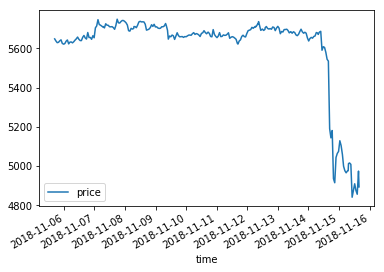

In [7]:
df.plot()

## Grouping timeseries by daily average price

In [8]:
df.groupby(pd.Grouper(freq="d")).mean()

,price
time,
2018-11-05,5634.581589
2018-11-06,5646.429555
2018-11-07,5721.241746
2018-11-08,5713.695722
2018-11-09,5680.302232
2018-11-10,5673.671151
2018-11-11,5658.137700
2018-11-12,5705.132485
2018-11-13,5682.956508
